In [1]:
from pykat import finesse        # import the whole pykat.finesse package
from pykat.commands import *     # import all packages in pykat.commands
import numpy as np               # for basic math/sci/array functions
import matplotlib.pyplot as plt  # for plotting
import inspect                   # for looking at source codes of functions
import pykat.ifo.aligo as aligo

# tell the notebook to automatically show plots inline below each cell
%matplotlib inline               
# use pykat's plotting style. change dpi to change plot sizes on your screen
pykat.init_pykat_plotting(dpi=90)

base = aligo.make_kat()
base.maxtem=4
base = aligo.setup(base,verbose=True)

ULbase = base.deepcopy()
ULbase.removeBlock("locks")


                                              ..-
    PyKat develop         _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,
   `^-....____:   +.      www.gwoptics.org/pykat

-- pretuning interferometer to precision 0.001 deg = 2.95556e-12 m
   scanning X arm (maximising power)
   found max/min at: 0 (precision = 0.00030375)
   scanning Y arm (maximising power)
   found max/min at: 0 (precision = 0.00030375)
   scanning MICH (minimising power)
   found max/min at: -0.001 (precision = 0.00010125)
   scanning PRCL (maximising power)
   found max/min at: 0.007 (precision = 0.00030375)
   scanning SRCL (maximising carrier power, then adding 90 deg)
   found max/min at: -90.056 (precision = 0.00030375)
   ... done
-- adjusting PRC length
   adusting kat.lp1.L by -0.0

In [14]:
print(inspect.getsource(pykat.ifo.scan_DOF))

def scan_DOF(kat, DOF, xlimits=[-100, 100], steps=200, relative=False, extra_cmds=None): 
    kat = kat.deepcopy()
    kat.parse(scan_DOF_cmds(DOF, xlimits=xlimits, steps=steps, relative=relative))
    
    if DOF.port is not None:
        kat.parse(DOF.signal())
    
    if extra_cmds:
        kat.parse(extra_cmds)
        
    return kat.run(cmd_args=["-cr=on"])



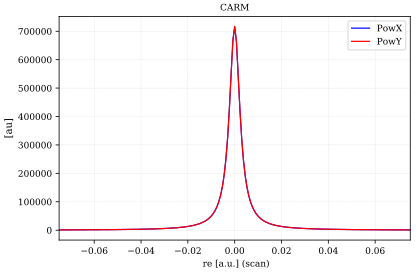

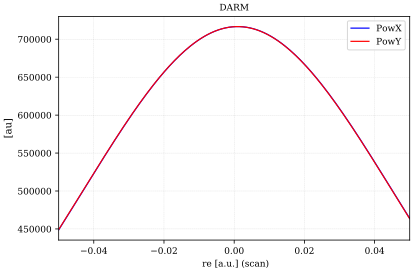

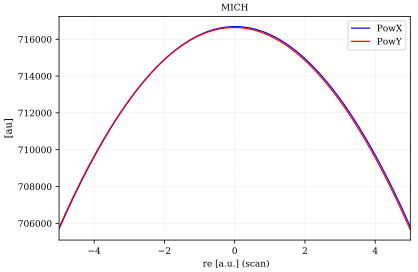

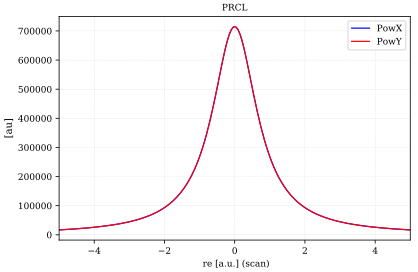

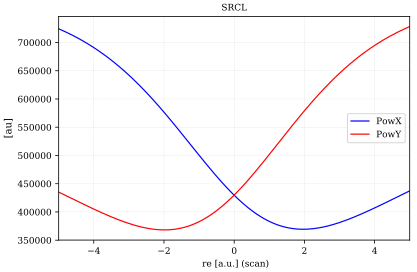

In [22]:
kat = ULbase.deepcopy()
kat.maxtem=-1
kat.IFO.POW_X.add_signal()
kat.IFO.POW_Y.add_signal()
for DD in [kat.IFO.CARM, kat.IFO.DARM, kat.IFO.MICH, kat.IFO.PRCL, kat.IFO.SRCL]:
    o = DD.scan(xlimits = [-DD.scale*0.05,DD.scale*0.05])
    o.plot([kat.IFO.POW_X.name,kat.IFO.POW_Y.name],title=DD.name)

## mich slightly asymm? --> try schnupp vs arm powers

In [29]:
base.IFO.lSchnupp, base.ly1.L-base.lx1.L, base.IFO.lx-base.IFO.ly, base.lx1.L, base.ly1.L

(0.07998964900331806,
 0.019599999999999618,
 0.07998964900331806,
 <Param (lx1.L=4.993) at 0x181f082e10>,
 <Param (ly1.L=5.0126) at 0x181f065c50>)

--------------------------------------------------------------
Running kat - Started at 2019-08-29 09:44:46.691098


 63% | ETA:  0:00:00 | Calculating                                             

Used Finesse 2.2 at /Users/annagreen/GIT/Finesse/finesse/kat

Finished in 1.70213 seconds


100% | ETA:  0:00:00 | Saving data                                             

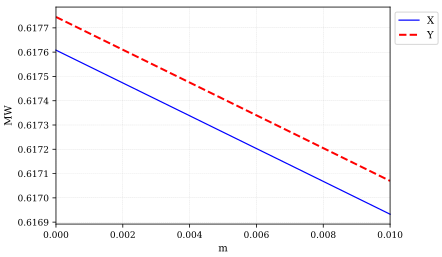

In [38]:
kat = ULbase.deepcopy()
kat.verbose=True
kat.IFO.POW_X.add_signal()
kat.IFO.POW_Y.add_signal()
kat.parse("""
xaxis* lx1 L lin 0 0.01 100
put* ly1 L $mx1""")
o=kat.run()
plt.plot(o.x,o[kat.IFO.POW_X.name]/1e6,label='X')
plt.plot(o.x,o[kat.IFO.POW_Y.name]/1e6,label='Y',ls='--',lw=2)
plt.ylabel('MW')
plt.xlabel('m')
plt.legend(loc=2,bbox_to_anchor=(1,1))